# Multiple Linear Regression(CO2 emission prediction)

In [52]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Admin\Downloads\data.csv')
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [2]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [3]:
df.tail()

,Car,Model,Volume,Weight,CO2
31,Volvo,XC70,2000,1746,117
32,Ford,B-Max,1600,1235,104
33,BMW,216,1600,1390,108
34,Opel,Zafira,1600,1405,109
35,Mercedes,SLK,2500,1395,120


In [4]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [6]:
df.shape

(36, 5)

In [8]:
df1=df[["Volume","Weight","CO2"]]
df1.corr()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


In [31]:
#Setting the value for X and Y
X = df[['Weight', 'Volume']]
Y = df['CO2']

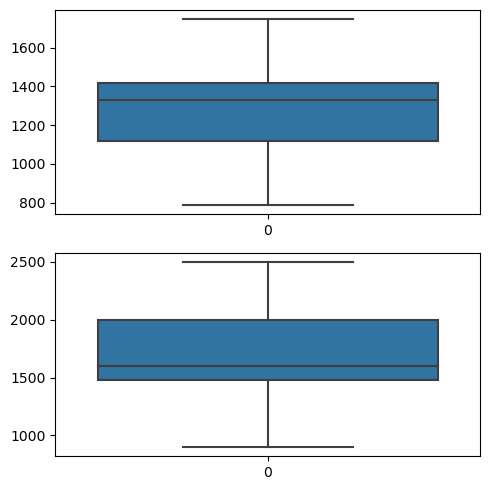

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Weight'], ax = axs[0])
plt2 = sns.boxplot(df['Volume'], ax = axs[1])
plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\26518429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2']);


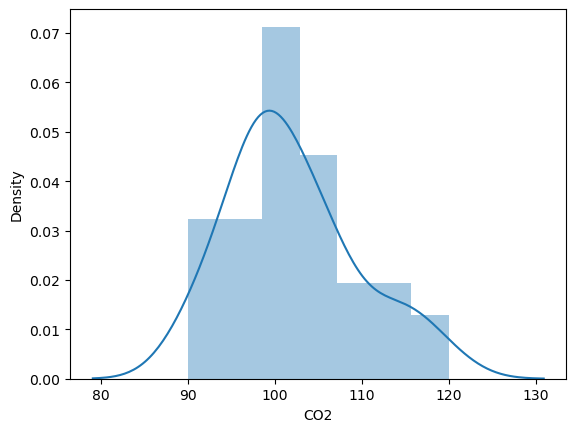

In [33]:
sns.distplot(df['CO2']);

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


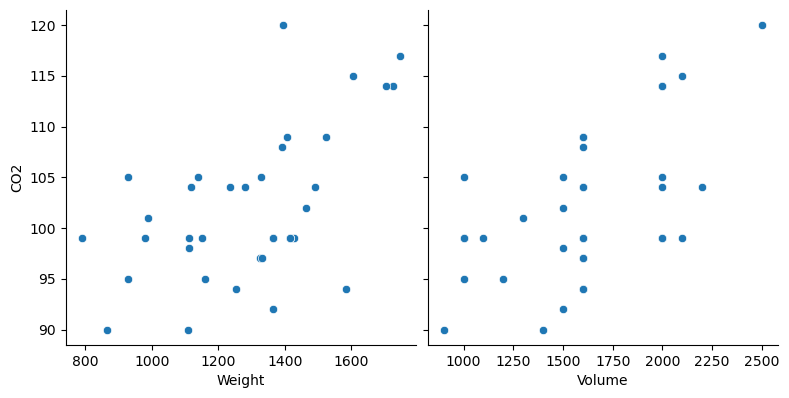

In [36]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()


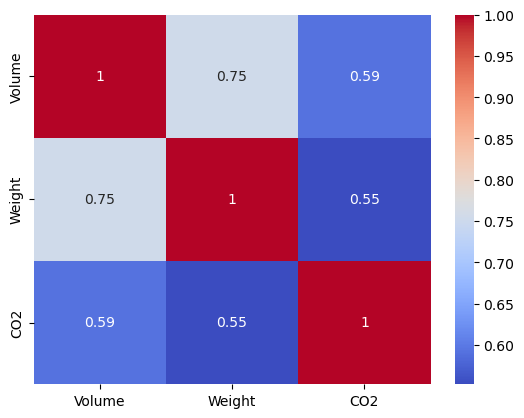

In [37]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Model Building

In [53]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,train_size=0.8, random_state=0000)

In [54]:
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [55]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(28, 2)
(28,)
(8, 2)
(8,)


In [56]:
import numpy as np
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]

In [57]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(28, 1, 2)
(28,)
(8, 1, 2)
(8,)


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [39]:
Y_train.shape

(25,)

In [40]:
Y_test.shape

(11,)

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg_model = linear_model.LinearRegression()

In [42]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [43]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [48]:
#Predicting the Test and Train set result 
Y_pred= reg_model.predict(X_test)  
X_pred= reg_model.predict(X_train) 

In [49]:
print("Prediction for test set: {}".format(Y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [50]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [51]:
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998792
Root Mean Square Error: 7.9622643205301795
